In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")
##the inline statement helps to create charts just below the code execution box,or else we have to use plt.show()
##each time to display the graphs

In [82]:
ts = pd.read_csv("Sales_TS.csv")

In [83]:
ts.head()

,Month,Sales
0,01-Jan,266.0
1,01-Feb,145.9
2,01-Mar,183.1
3,01-Apr,119.3
4,01-May,180.3


In [84]:
ts = pd.read_csv("Sales_TS.csv",index_col=[0],parse_dates=True,squeeze=True)

In [85]:
#we need the index to be month,as it is easily referencible.we put col[0] as we want monthly data in the series form,we 
#use parse_dates to easily recognize the dates column,and lastly the squeeze parameter converts the data into a series
#do shift+tab+tab to get signature

In [86]:
type(ts)

pandas.core.series.Series

In [87]:
ts.head()

Month
01-Jan    266.0
01-Feb    145.9
01-Mar    183.1
01-Apr    119.3
01-May    180.3
Name: Sales, dtype: float64

In [88]:
type(ts)

pandas.core.series.Series

<AxesSubplot:xlabel='Month'>

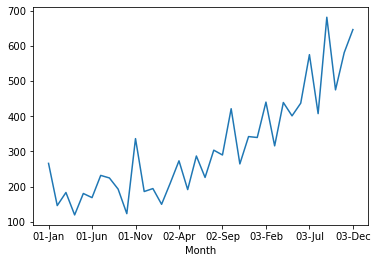

In [89]:
ts.plot()

In [90]:
#Clear indication that trend is present with seasonal fluctuations

In [91]:
ts.size

36

In [92]:
ts.describe()

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales, dtype: float64

Moving averages can smooth time series data, reveal underlying trends. Smoothing is the process of removing random variations that appear as coarseness in a plot of raw time series data.
A rolling average, sometimes referred to as a moving average, is a metric that calculates trends over short periods of time using a set of data. Specifically, it helps calculate trends when they might otherwise be difficult to detect.

In [93]:
#Smoothing the time series by calculating the MA
ts_ma=ts.rolling(window=10).mean()

In [94]:
#A rolling window model involves calculating a statistic on a fixed contiguous block of prior observations 
#and using it as a forecast. In this case we take the average of 10 past time sales and that is the single value
#at the 10th position.

## You can often break the series down into trend and seasonal effects as well as long term cycles (plus, of course, an irregular and essentially unpredictable component). But the trend and seasonal effects can change over time. A rolling window allows you to avoid taking too much account of historical effect values that might have changed. 

<AxesSubplot:xlabel='Month'>

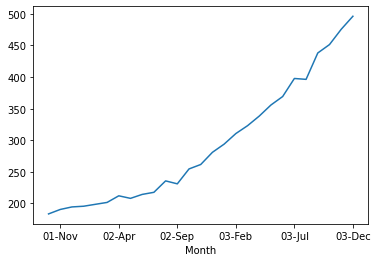

In [95]:
ts_ma.plot()

#in this case we see that the value starts from 1-11 so the first 10 values are gone.(averaged out)

In [96]:
#We use the MA method majorly in stock market analysis,to detect any particular trend,
##if identification of a trend is not possible.

## we create the base model now. the base model is the starting model,or the first model,which requires no assumptions and the simplest model which follows the assumption that the second period forecast depends on the forecast of the 1st period. So sales of 145.9 can be predicted taken only the sales of the first period into account,i.e 266.0 implies the previous period values are dependent on the current values,so what we observe yesterday,will be reflected today too,only with a slight variation.

In [97]:
ts

Month
01-Jan    266.0
01-Feb    145.9
01-Mar    183.1
01-Apr    119.3
01-May    180.3
01-Jun    168.5
01-Jul    231.8
01-Aug    224.5
01-Sep    192.8
01-Oct    122.9
01-Nov    336.5
01-Dec    185.9
02-Jan    194.3
02-Feb    149.5
02-Mar    210.1
02-Apr    273.3
02-May    191.4
02-Jun    287.0
02-Jul    226.0
02-Aug    303.6
02-Sep    289.9
02-Oct    421.6
02-Nov    264.5
02-Dec    342.3
03-Jan    339.7
03-Feb    440.4
03-Mar    315.9
03-Apr    439.3
03-May    401.3
03-Jun    437.4
03-Jul    575.5
03-Aug    407.6
03-Sep    682.0
03-Oct    475.3
03-Nov    581.3
03-Dec    646.9
Name: Sales, dtype: float64

## To create the baseline model,we use the shift method,that is just shifting each datapoint 1 step down. When we use the shift function and print the series,we see that the sales of the current period will depend on excatly the last period sales. 

In [98]:
ts_base = pd.concat([ts,ts.shift(1)],axis=1)

In [99]:
ts_base

,Sales,Sales
Month,,
01-Jan,266.0,NaN
01-Feb,145.9,266.0
01-Mar,183.1,145.9
01-Apr,119.3,183.1
01-May,180.3,119.3
01-Jun,168.5,180.3
01-Jul,231.8,168.5
01-Aug,224.5,231.8
01-Sep,192.8,224.5


In [100]:
ts_base.columns = ["Actual_sales","Forecasted_sales"] #modyfying the column names for better understanding

In [101]:
ts_base.head()

,Actual_sales,Forecasted_sales
Month,,
01-Jan,266.0,NaN
01-Feb,145.9,266.0
01-Mar,183.1,145.9
01-Apr,119.3,183.1
01-May,180.3,119.3


In [102]:
ts_base.dropna(inplace=True) #create changes within the same dataframe,without creating a copy.
                             #And the changes are parmanent.

In [103]:
ts_base

,Actual_sales,Forecasted_sales
Month,,
01-Feb,145.9,266.0
01-Mar,183.1,145.9
01-Apr,119.3,183.1
01-May,180.3,119.3
01-Jun,168.5,180.3
01-Jul,231.8,168.5
01-Aug,224.5,231.8
01-Sep,192.8,224.5
01-Oct,122.9,192.8


In [104]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [105]:
ts_error = mean_squared_error(ts_base.Actual_sales,ts_base.Forecasted_sales)

In [106]:
ts_error

11715.388285714285

In [107]:
np.sqrt(ts_error) #we do not work with the squared error

108.23764726616282

In [108]:
#PACF gives the AR component and ACF gives the MA component

In [109]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

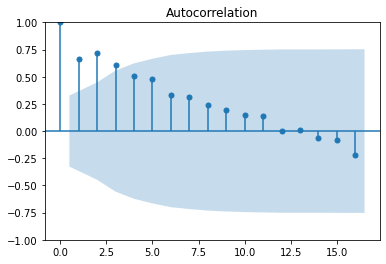

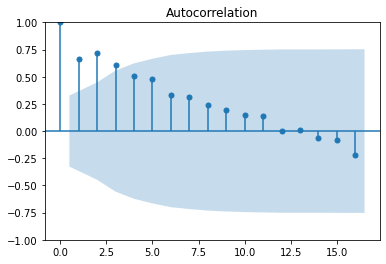

In [110]:
plot_acf(ts)

## This acf plot shows the correlation of the 1st value with the first value(266 with 266),the second term shows the correlation of the second term with the first value,third line shows the correlation of the 3rd point with the 2nd point and so on. In this plot we see the autocorrelation drops post the 4th point(3rd term),and enters the critical zone. so q=3

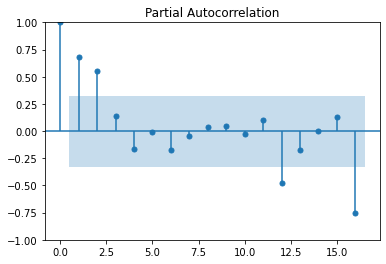

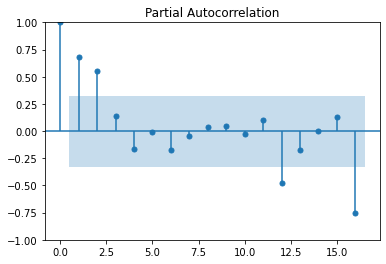

In [111]:
# q=3
plot_pacf(ts)

In [112]:
#P=2
#from the above plot it is evident that post the 3rd line(2nd index)the correlation drops to the critical zone. so P=2
#Now the term 'd' (differencing for stationarity,which removes the trend and seasonal factors
#from the time series and helps us to make better predictions) varies between 0 to 2. 
#so we will explore with all possible combinations here
#(2,0,3),(2,1,3),(2,2,3) and so on... for (p,d,q)AR=P,I=d,MA=q


#we try for ,(2,1,3),then (3,1,3) and finally (2,0,3), (3,1,2) 

In [113]:
#from statsmodels.tsa.arima_model import ARIMA

In [114]:
from statsmodels.tsa.arima.model import ARIMA

In [115]:
ts_train = ts[0:24]
ts_test = ts[24:36]   

In [116]:
ts_model = ARIMA(ts_train,order=(2,2,3))
#ts_model = ARIMA(ts_train,order=(2,0,3))
#ts_model = ARIMA(ts_train,order=(2,1,3))
#ts_model = ARIMA(ts_train,order=(4,1,5))

In [117]:
ts_model_fit=ts_model.fit() #we get error for (2,1,3) then we try for 

In [118]:
ts_model_fit.aic

260.78916422230986

In [119]:
#we generate the  12 months forecast for the test data
ts_forecast= ts_model_fit.forecast(steps=12) #so the first series [0] will contain the actaul forecast values

In [120]:
np.sqrt(mean_squared_error(ts_test,ts_forecast))

82.1371055389411

## ARIMA(2, 2, 3) gives a lower MSE than the base model,so this will be the best model as its   MSE is lower than the base MSE.
## So,NO more transformations are needed. You will need to transform your series by differencing/log transformations only if your base models MSE is lowest than your ARIMA models.